**Sales in Franchised vs Non-Franchised Restaurants**

**Introduction**

In the restaurant industry, there are many variables that may directly or indirectly impact success. One key strategy often implemented by business owners is franchising, which is the practice of granting an individual or a company the rights to operate their business under its original brand. Studies show that franchised firms in the hospitality and retail industries typically experience higher profitability compared to non-franchised firms (Hsu & Jang, 2009; Moon & Sharma, 2014). However, the relationship between franchise proportion and profitability exhibits a curvilinear inverted-U association, which suggests that the level to which companies franchise can be both too low as well as too high, each resulting in lower profitability levels. While franchising has resulted in rapid growth in America’s retail and hospitality industries, the question arises of whether franchising increases sales in the restaurant industry as well. 

Therefore, the purpose of this project is to explore whether there is a difference in sales between franchised restaurants and non-franchised restaurants across all fast-growing restaurants in America. To examine this potential difference, the mean of sales will be used as the location parameter and the standard deviation of sales will be used as the scale parameter. These parameters are better suited for relatively normal distributions with little to no outliers, and the total sales are the quantities of analysis.

For this exploration, the Future50 dataset will be used, which is a list of the fastest-growing American restaurants in 2020 compiled by Restaurant Business Magazine. Restaurants in this set have between $20-50 million in annual sales and they are ranked based on the greatest difference in system-wide sales from 2018 to 2019. Columns in this dataset include restaurant rank, name, location, system-wide sales for 2019, year-on-year percentage increase in sales, number of units (premises), average unit volumes for 2019, and franchise status. Since sales are the main revenue stream for a restaurant, they are imperative to a company’s profitability and overall success. Therefore, analyzing sales as a variable may provide insight into financially effective business strategies. We will focus on system-wide sales between franchised and non-franchised restaurants for our analysis. This dataset will be treated as a sample of 50 restaurants, of which 29 are franchises and 21 are non-franchises.

**Preliminary Results**

In [93]:
# loading required libraries
library(tidyverse)
library(dplyr)
library(infer)
library(ggplot2)
library(tibble)
library(cowplot)

In [49]:
# reading and previewing the data from online
future50_raw <- read_csv("https://drive.google.com/uc?id=1PAUMvsMZahDVFDRbyIq4QywM_A-8dlux&export=download", show_col_types = FALSE) #nolint

head(future50_raw)

Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes
6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes


Table 1. Raw data from the dataset

In this dataset, there are 50 rows in total, representing 50 different restaurants. We will be focusing on the Sales (shown in millions), and Franchising status.  
The next step is to clean and wrangle the data.

In [108]:
# selecting only Sales and Franchising columns
future50_selected <- future50_raw %>%
    select(Sales, Franchising)

# transforming Franchising column from character type to logical type
future50_logical <- future50_selected %>%
    mutate(Franchising = ifelse(Franchising == "Yes", 1, 0)) %>%
    mutate(Franchising = as.logical(Franchising))

# tidy data
future50 <- future50_logical
head(future50)

Sales,Franchising
<dbl>,<lgl>
24,FALSE
44,TRUE
21,TRUE
25,TRUE
49,TRUE
39,TRUE


Table 2. Tidy data from dataset. Only the sales and their franchising status is shown now.  
  
The next step is to separate the two groups (franchised vs non-franchised) and plot their distributions on a histogram.

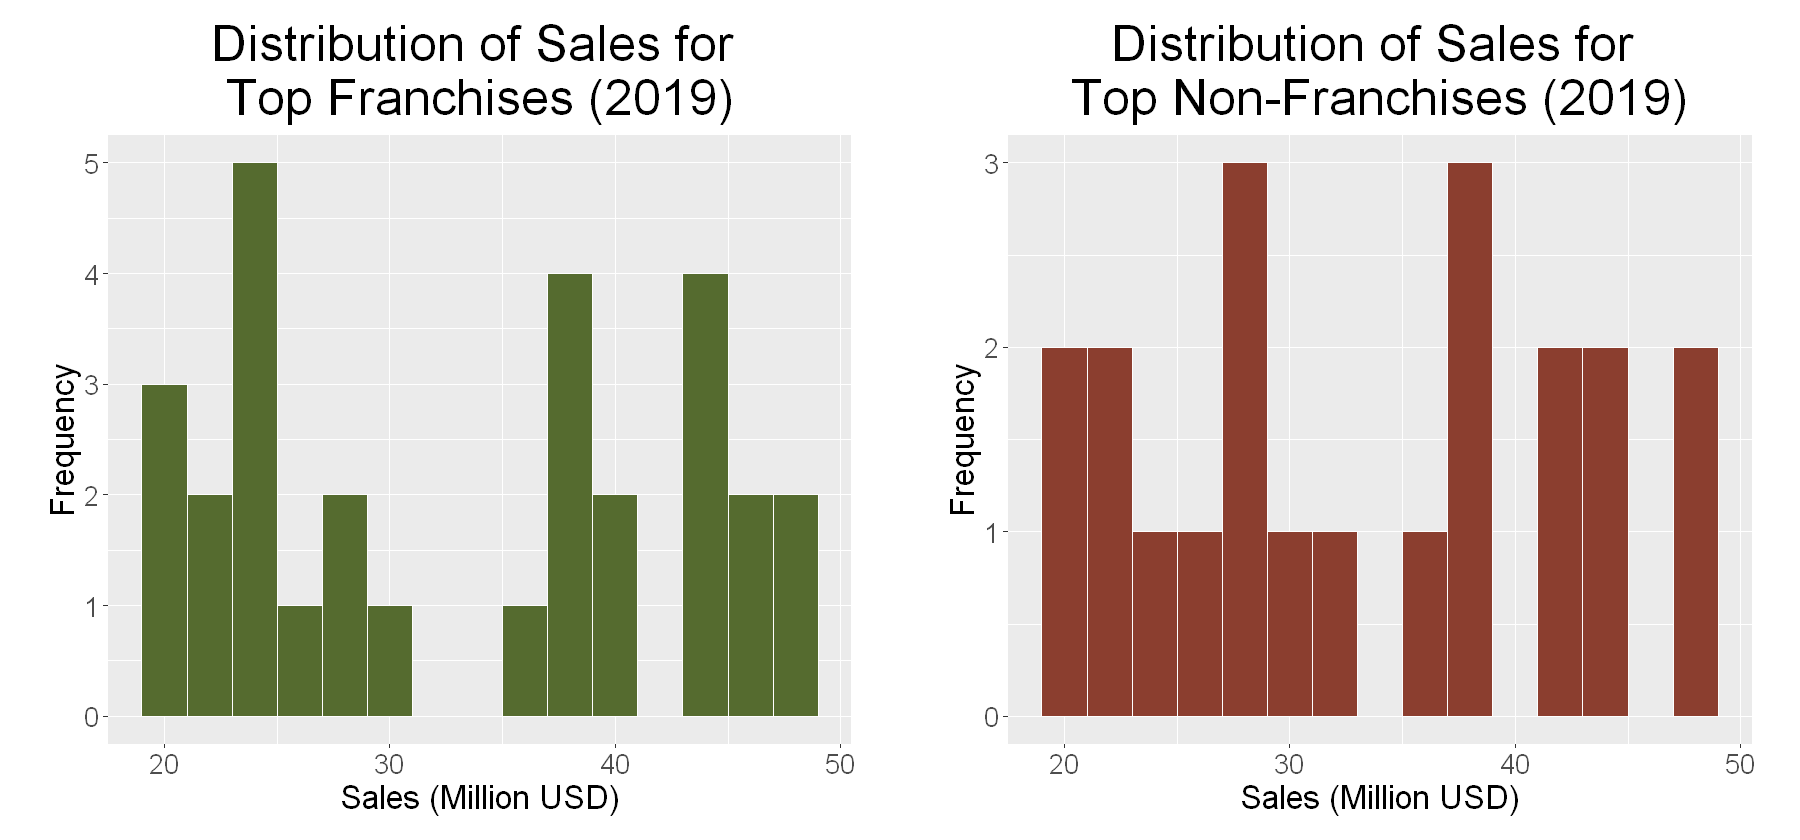

In [109]:
# franchised restaurants
future50_yes <- future50 %>%
    filter(Franchising == TRUE)

future50_yes_plot <- future50_yes %>%
    ggplot(aes(x = Sales)) +
    geom_histogram(binwidth = 2, colour = "white", fill = "darkolivegreen") +
    labs(title = "Distribution of Sales for \nTop Franchises (2019)",
         x = "Sales (Million USD)",
         y = "Frequency") +
    theme(plot.title = element_text(hjust = 0.5, size = 30),
          text = element_text(size = 20),
          plot.margin = unit(c(1, 2, 1, 2), "lines"))


          

# non-franchised restaurants
future50_no <- future50 %>%
    filter(Franchising == FALSE)

future50_no_plot <- future50_no %>%
    ggplot(aes(x = Sales)) +
    geom_histogram(binwidth = 2, colour = "white", fill = "coral4") + 
    labs(title = "Distribution of Sales for \nTop Non-Franchises (2019)",
         x = "Sales (Million USD)",
         y = "Frequency") +
    theme(plot.title = element_text(hjust = 0.5, size = 30),
          text = element_text(size = 20),
          plot.margin = unit(c(1, 2, 1, 2), "lines"))

# plot display
options(repr.plot.width = 15, repr.plot.height = 7)
plot_grid(future50_yes_plot, future50_no_plot)

Figure 1.1 (Left) - Distribution of Sales for Top Franchises (2019)  
Figure 1.2 (Right) - Distribution of Sales for Top Non-Franchises (2019)  
  
Next, estimates will be computed for the parameter of the mean total sales of all franchised and non-franchised restaurants across all restaurants in America.

In [119]:
# estimating the population parameter for franchised restaurants
future50_yes_estimate <- future50_yes %>%
    summarise(franchised_mean_sales = mean(Sales))

# estimating the population parameter for non-franchised restaurants
future50_no_estimate <- future50_no %>%
    summarise(nonfranchised_mean_sales = mean(Sales))

# parameter estimate
merge(future50_yes_estimate, future50_no_estimate)

franchised_mean_sales,nonfranchised_mean_sales
<dbl>,<dbl>
33.82759,33.71429


Table 3. Estimates for the parameter of total sales across all restaurants in America, in million USD (grouped by franchising status)

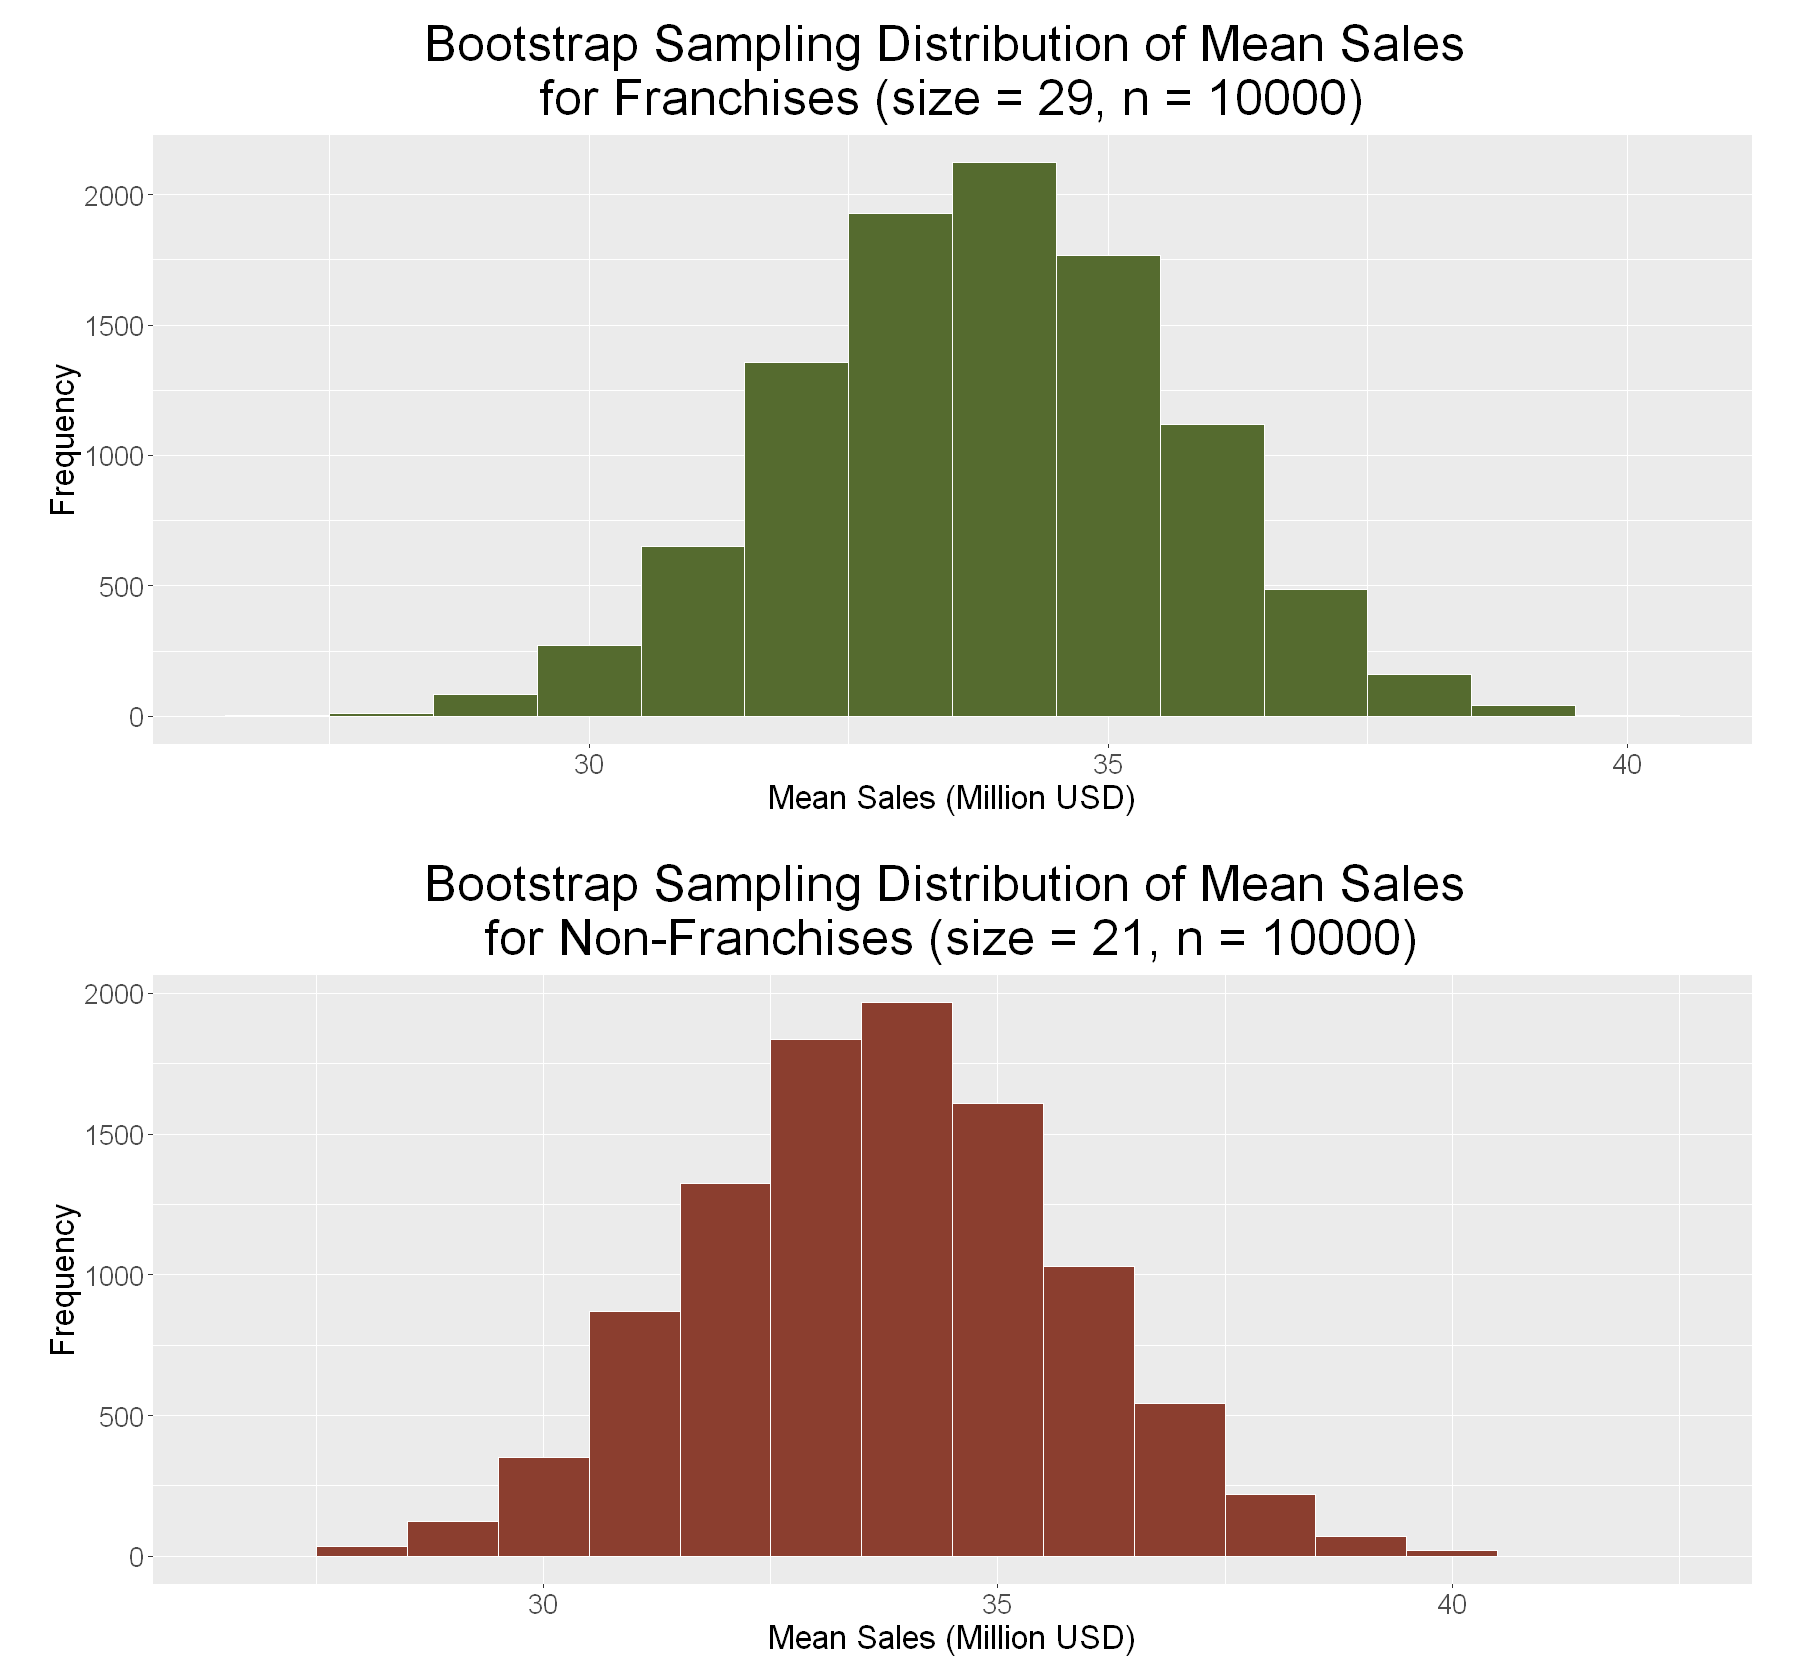

In [128]:
# computing bootstrap distribution for mean sales of franchised restaurants
franchise_bootstrap <- future50_yes %>%
    select(Sales) %>%
    rep_sample_n(reps = 10000, size = 29, replace = TRUE) %>%
    group_by(replicate) %>%
    summarize(bootstrap_mean = mean(Sales))

franchise_bootstrap_plot <- franchise_bootstrapped %>%
    ggplot(aes(x = bootstrap_mean)) +
    geom_histogram(binwidth = 1, colour = "white", fill = "darkolivegreen") + 
    labs(title = "Bootstrap Sampling Distribution of Mean Sales \nfor Franchises (size = 29, n = 10000)", #nolint
         x = "Mean Sales (Million USD)",
         y = "Frequency") +
    theme(plot.title = element_text(hjust = 0.5, size = 30),
          text = element_text(size = 20),
          plot.margin = unit(c(1, 2, 1, 2), "lines"))


# computing bootstrap distribution for mean sales of non-franchised restaurants
non_franchise_bootstrap <- future50_no %>%
    select(Sales) %>%
    rep_sample_n(reps = 10000, size = 21, replace = TRUE) %>%
    group_by(replicate) %>%
    summarize(bootstrap_mean = mean(Sales))

non_franchise_bootstrap_plot <- non_franchise_bootstrapped %>%
    ggplot(aes(x = bootstrap_mean)) +
    geom_histogram(binwidth = 1, colour = "white", fill = "coral4") +
    labs(title = "Bootstrap Sampling Distribution of Mean Sales \nfor Non-Franchises (size = 21, n = 10000)", #nolint
         x = "Mean Sales (Million USD)",
         y = "Frequency") +
    theme(plot.title = element_text(hjust = 0.5, size = 30),
          text = element_text(size = 20),
          plot.margin = unit(c(1, 2, 1, 2), "lines"))

# display plots
options(repr.plot.width = 15, repr.plot.height = 14)
plot_grid(franchise_bootstrap_plot, non_franchise_bootstrap_plot, ncol = 1)


**Methods: Plan**

Overall, we are expecting to find a statistically significant difference in system wide sales for 2019 between restaurants that are a franchise and restaurants that are not a franchise. Such findings have the potential to guide restaurant industry professionals into making business decisions regarding franchising. If we observe a significant difference in sales between franchised restaurants and non-franchised restaurants, it suggests that business owners should franchise to increase revenue.

Future explorations could investigate the optimal points of franchising at which profitability is maximized. While previous literature has indicated the existence of an inverted-U curvilinear relationship between franchising and profitability, the induction of the point and the factors affecting the point were not well explored.


**References**

Franchise | Encyclopedia.com. (n.d.). Retrieved March 3, 2022, from https://www.encyclopedia.com/social-sciences-and-law/economics-business-and-labor/businesses-and-occupations/franchise

Hsu, L.-T. (Jane), & Jang, S. (Shawn). (2009). Effects of restaurant franchising: Does an optimal franchise proportion exist? International Journal of Hospitality Management, 28(2), 204–211. https://doi.org/10.1016/j.ijhm.2008.07.002

Moon, J., & Sharma, A. (2014). Franchising Effects on the Lodging Industry: Optimal Franchising Proportion in Terms of Profitability and Intangible Value. Tourism Economics, 20(5), 1027–1045. https://doi.org/10.5367/te.2013.0336

Restaurant business rankings 2020. (n.d.). Retrieved March 3, 2022, from https://kaggle.com/michau96/restaurant-business-rankings-2020

The Future 50. (n.d.). Restaurant Business. Retrieved March 3, 2022, from https://restaurantbusinessonline.com/future-50-2020